# Práctica 4 - Bordes y Esquinas

## Preparación

Para correr este Jupyter Notebook es necesario tener instalado Octave y octave_kernel, el cual permite utilizar Octave en Jupyter. En Ubuntu se pueden instalar mediante:

```
sudo apt-get install octave
```

y

```
pip3 install octave_kernel
```


## 1. Contaminamos *lena* y *test* con ruido

In [1]:
lena = imread("img/lena256.png");
test = imread("img/test.png");

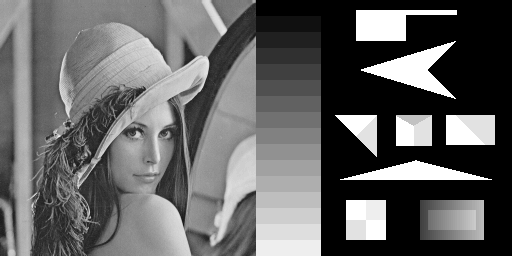

In [2]:
imshow([lena, test])

Definimos las funciones de ruido vistas en la práctica 3:

In [3]:
function res = gaussNoise(img, perc)
    Inoise = normrnd(0, 1, size(img));
    res = img + (Inoise * perc * 255);
endfunction

In [4]:
function res = rayleighNoise(img, epsilon)
    Inoise = sqrt(-epsilon * log(1 - rand(size(img))));
    res = img .* Inoise;
endfunction

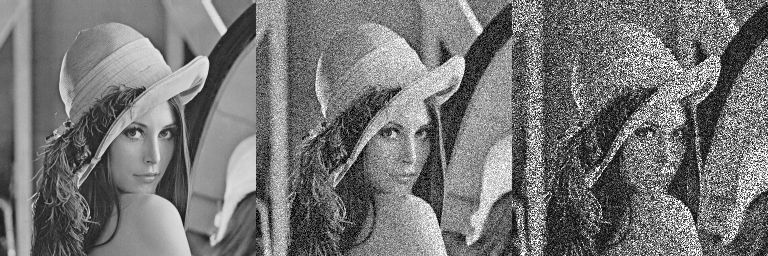

In [5]:
lenaGauss = gaussNoise(lena, 0.1);
lenaRayleigh = rayleighNoise(lena, 1);
imshow([lena, lenaGauss, lenaRayleigh])

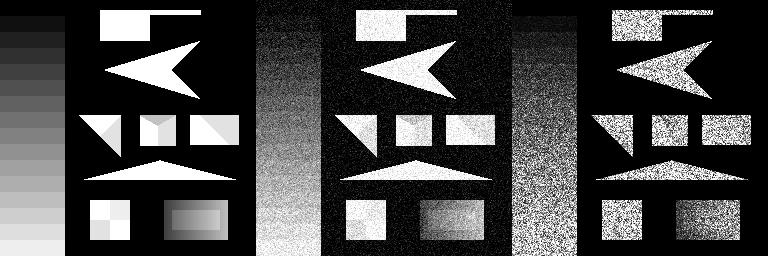

In [6]:
testGauss = gaussNoise(test, 0.1);
testRayleigh = rayleighNoise(test, 1);
imshow([test, testGauss, testRayleigh])

## 2. Detectores de borde

### a. Método del Laplaciano

In [82]:
laplaceKernel = [0 1 0; 1 -4 1; 0 1 0]

laplaceKernel =

   0   1   0
   1  -4   1
   0   1   0



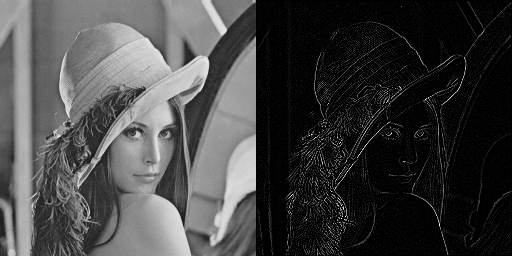

In [186]:
imshow([lena, conv2(lena, laplaceKernel, "same")])

#### Buscamos ahora los ceros en el filtro Laplaciano

In [257]:
filtIm = conv2(lena, laplaceKernel, "same");

El resultado de aplicar la convolución con el kernel Laplaciano es una aproximación a la suma de las derivadas de segundo orden en cada píxel de la imagen:

In [336]:
filtIm(1:10, 1:10)

ans =

  -325  -162  -154  -163  -169  -160  -159  -156  -149  -175
  -162    -4     6    -2    -6    -1    -3     0     7   -16
  -172    10    -2    -3    -7     5     3    -3     3   -12
  -165     4    -9    14    -5   -13    14    13    -8    14
  -142    -5     3    -2    -1     2    -5    -3     6   -10
  -154    -4    -6    30   -16     3     2     2    -7    12
  -161     3    -1    -7     0    -1    10   -17    11    -4
  -160    -5     4     0    -4    -1     5   -12     1    -1
  -155     2    -4    13    -3     3    -3    10    10     1
  -154     6   -13     5    -7     6    -2    -6    -6    -9



Lo que queremos buscar ahora son los cruces de ceros (zero-crossing), es decir, píxeles dónde el signo del laplaciano cambia en su vecindad.

In [337]:
function z = zerocrossings(f)
    zneg = f < 0;
    [R,C] = size(f);
    # z va a ser la matriz booleana de píxeles donde ocurre un cruce de ceros
    z = zeros(R,C);
    # Se marca 1 si un pixel vecino cambia de signo (comparando con zneg)
    z(1:R-1,:) |= zneg(2:R,:);
    z(2:R,:)   |= zneg(1:R-1,:);
    z(:,1:C-1) |= zneg(:,2:C);
    z(:,2:C)   |= zneg(:,1:C-1);
    # Finalmente se queda sólo con los cruces en los puntos no negativos (ceros y positivos)
    z &= !zneg;
endfunction

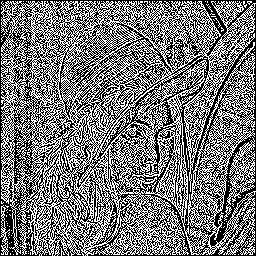

In [339]:
imshow(zerocrossings(filtIm))

#### Detector de bordes Laplaciano

In [340]:
function res = edgeLaplace(img)
    f = [0 1 0; 1 -4 1; 0 1 0];
    # Aplica filtro Laplaciano
    g = conv2(img, f, "same");
    # Busca los cruces de ceros,
    # y aplica un umbral para quedarse sólo con puntos de alto contraste
    res = (abs(g) > mean(abs(g))) & zerocrossings(g);
endfunction

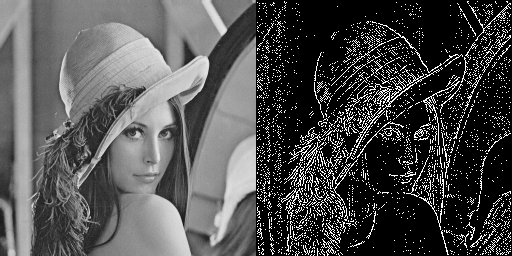

In [343]:
imshow([lena, edgeLaplace(lena)*255])

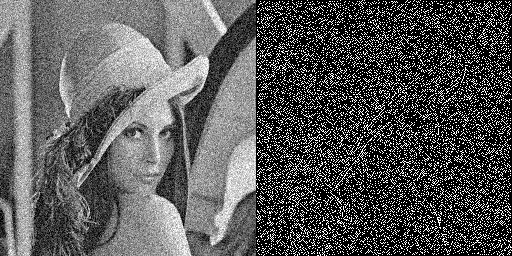

In [344]:
imshow([lenaGauss, edgeLaplace(lenaGauss)*255])

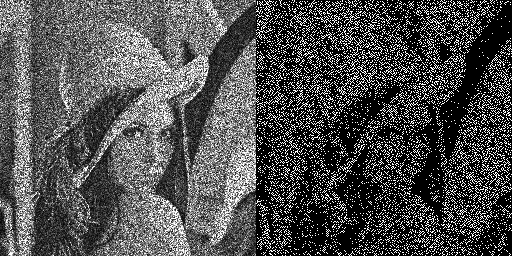

In [345]:
imshow([lenaRayleigh, edgeLaplace(lenaRayleigh)*255])

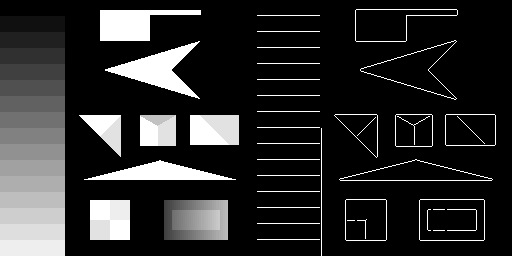

In [347]:
imshow([test, edgeLaplace(test)*255])

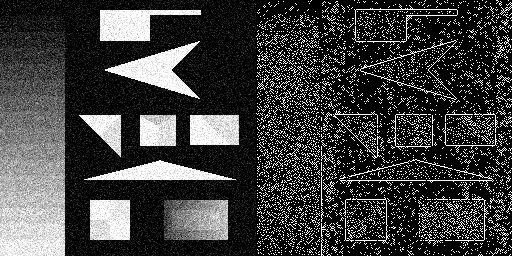

In [348]:
imshow([testGauss, edgeLaplace(testGauss)*255])

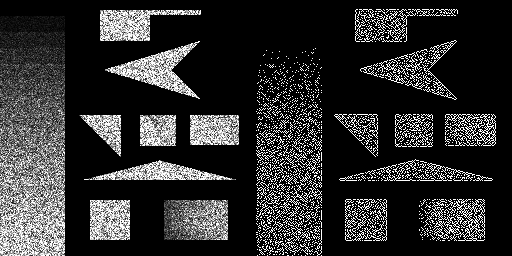

In [349]:
imshow([testRayleigh, edgeLaplace(testRayleigh)*255])

### c. Método del Laplaciano del Gaussiano

In [353]:
function res = edgeLoG(img)
    # Aplica un filtro gaussiano 5x5
    f = [1,4,6,4,1; 4,16,24,16,4; 6,24,36,24,6; 4,16,24,16,4; 1,4,6,4,1]/256;
    g = conv2(img, f, "same");
    # Busca bordes con Laplace
    res = edgeLaplace(g);
endfunction

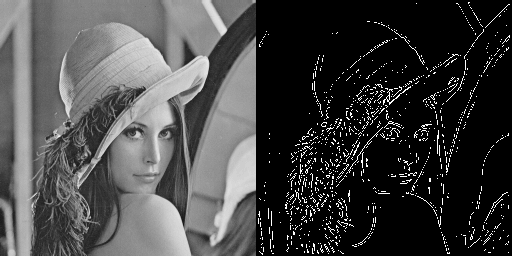

In [356]:
img = lena;
imshow([img, edgeLoG(img)*255])

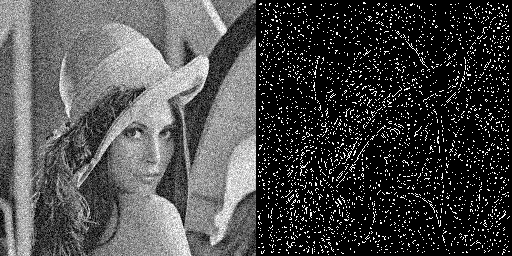

In [357]:
img = lenaGauss;
imshow([img, edgeLoG(img)*255])

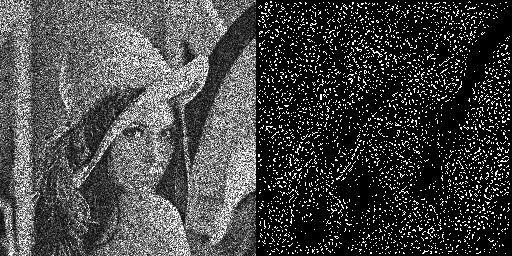

In [358]:
img = lenaRayleigh;
imshow([img, edgeLoG(img)*255])